### Rohith Reddy Vangala
### 016762109
### Deep Learning
### Assignment - 5
### Part - 2 LSGAN Implementation
### Git Link - https://github.com/rohithreddy66666/Deep_Learning_Assignments
### Google Drive for the folder used , I have made the folder public so please go through it , Thanks - https://drive.google.com/drive/folders/1iawn3Rc1CWfP3Ow8VNS7oFY5LyqaCwZw?usp=drive_link



### Note : I have'nt added comment for each cell because it is almost same with the part1 so only added wherevere relevant and have added a conclusion and comparision in the last cell


#### Downloading the Fashion MNIST Datset

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import FashionMNIST

fashion_mnist = FashionMNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

100%|██████████| 26421880/26421880 [00:01<00:00, 15695483.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 260989.49it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4739077.43it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19040808.63it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### transforming the pixel values from the range `[0, 1]` to the range `[-1, 1]`.

In [ ]:
# sample tensor from the data

img, label = fashion_mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

Label:  9
tensor([[[-1.0000, -1.0000, -1.0000,  0.5137,  0.7882],
         [-0.9765, -1.0000, -0.9059,  0.7176,  0.7255],
         [-0.9529, -1.0000, -0.2235,  0.9137,  0.7412],
         [-1.0000, -1.0000, -0.5686,  0.8510,  0.7882],
         [-1.0000, -1.0000,  0.8588,  0.7725,  0.7020]]])


(tensor(-1.), tensor(1.))

As we can see the pixel values range from -1 to 1.

### Denormalizing the Images

In [ ]:
# Function to denormalize the images
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [ ]:
# install matplotlib to plot the images
!pip install matplotlib

Label: 9


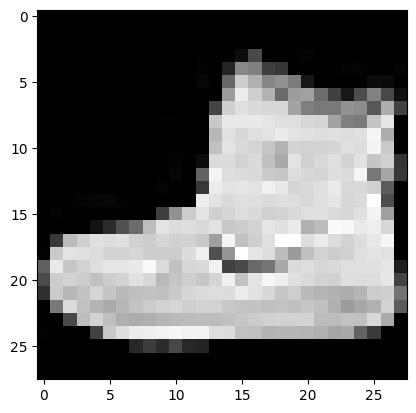

In [ ]:
# Showing the Image
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

### Creating the dataloader to load the images in batches.

In [ ]:
from torch.utils.data import DataLoader
batch_size = 100
data_loader = DataLoader(fashion_mnist, batch_size, shuffle=True)

first batch
torch.Size([100, 1, 28, 28])
tensor([3, 1, 1, 2, 2, 7, 2, 2, 9, 8, 4, 3, 6, 8, 0, 1, 9, 1, 0, 2, 9, 2, 5, 6,
        3, 2, 2, 0, 4, 4, 7, 6, 5, 5, 3, 9, 4, 5, 6, 4, 4, 4, 0, 9, 5, 4, 5, 4,
        3, 2, 8, 8, 4, 8, 7, 3, 4, 8, 6, 9, 6, 8, 8, 2, 7, 1, 6, 3, 6, 9, 5, 8,
        4, 3, 2, 0, 5, 9, 7, 4, 1, 9, 8, 4, 3, 6, 7, 0, 6, 2, 1, 3, 0, 2, 2, 8,
        3, 9, 6, 1])


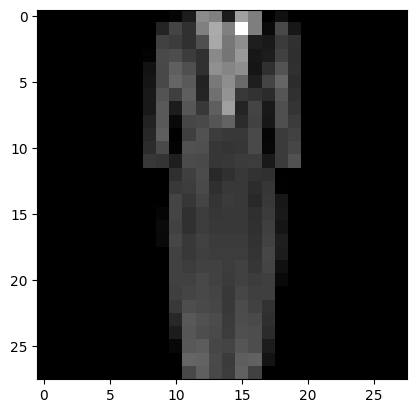

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Discriminator Network

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
D.to(device);

### Generator Network

In [ ]:
latent_size = 64

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

##### Showing Images from Generator Network

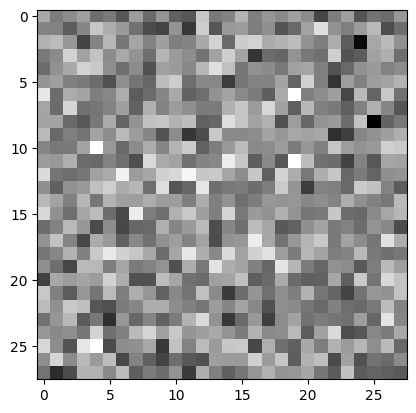

In [ ]:
plt.imshow(gen_imgs[0], cmap='gray');

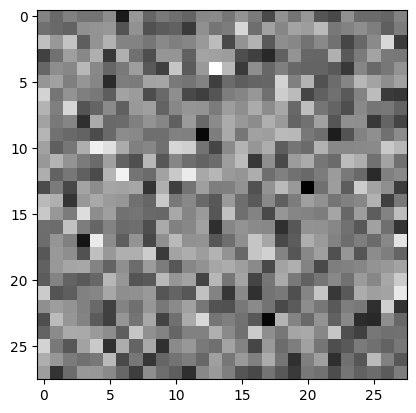

In [ ]:
plt.imshow(gen_imgs[1], cmap='gray');

In [ ]:
# moving the generator to the chosen device.
G.to(device);

### Discriminator Training


In [ ]:
# Define the binary cross entropy loss function
criterion = nn.MSELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)

The Mean Squared Error (MSE) Loss, utilized in Least Squares Generative Adversarial Networks (LSGANs), serves a crucial role in enhancing the training stability and quality of generated images. This choice is motivated by MSE Loss's ability to provide smoother gradients compared to the binary cross-entropy loss used in traditional GANs, which helps in mitigating the vanishing gradients problem and ensures more stable training dynamics. LSGANs, by leveraging MSE Loss, aim to minimize the Pearson χ² divergence between real and generated data distributions, encouraging the generator to produce outputs closer to the real data. This approach not only promotes higher quality in generated images but also contributes to reducing the risk of mode collapse, ensuring a wider variety of outputs. Thus, the adoption of MSE Loss in LSGANs is a strategic decision to improve training outcomes, making it a key factor in the effectiveness of these networks in generating realistic images.

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

In [ ]:
def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Loss for the real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for the fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine the losses
    d_loss = d_loss_real + d_loss_fake
    # Reset the gradients
    reset_grad()
    # Compute the gradients
    d_loss.backward()
    # Adjust the parameters using the backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

## Generator Training

##### Defining the Optimizer for generator

In [ ]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0001)

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

Training the GAN model to produce images in this new domain.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

sample_dir = '/content/drive/My Drive/fake_images_folder_LSGAN'
os.makedirs(sample_dir, exist_ok=True)


Save the batch of the real images, so can be use for the visual comparison by looking at the generated images.

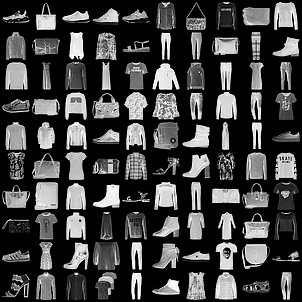

In [ ]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some of the real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break

Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


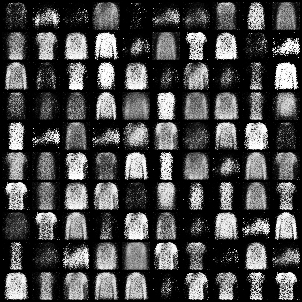

In [ ]:
import torch
from torchvision.utils import save_image
from PIL import Image

sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

# Before training
save_fake_images(0)
Image.open(os.path.join(sample_dir, 'fake_images-0000.png'))


We are now ready to train the model. In each epoch, we train the discriminator first, and then the generator.

In [ ]:
%%time

num_epochs = 50
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()

        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/50], Step [200/600], d_loss: 0.1206, g_loss: 0.9107, D(x): 0.85, D(G(z)): 0.13
Epoch [0/50], Step [400/600], d_loss: 0.1493, g_loss: 0.8029, D(x): 0.87, D(G(z)): 0.17
Epoch [0/50], Step [600/600], d_loss: 0.0990, g_loss: 0.8489, D(x): 0.90, D(G(z)): 0.12
Saving fake_images-0001.png
Epoch [1/50], Step [200/600], d_loss: 0.0562, g_loss: 0.8493, D(x): 0.94, D(G(z)): 0.09
Epoch [1/50], Step [400/600], d_loss: 0.0916, g_loss: 0.9121, D(x): 0.88, D(G(z)): 0.07
Epoch [1/50], Step [600/600], d_loss: 0.1227, g_loss: 0.8884, D(x): 0.85, D(G(z)): 0.10
Saving fake_images-0002.png
Epoch [2/50], Step [200/600], d_loss: 0.0592, g_loss: 0.9534, D(x): 0.90, D(G(z)): 0.02
Epoch [2/50], Step [400/600], d_loss: 0.0890, g_loss: 0.9298, D(x): 0.87, D(G(z)): 0.06
Epoch [2/50], Step [600/600], d_loss: 0.1050, g_loss: 0.8975, D(x): 0.86, D(G(z)): 0.05
Saving fake_images-0003.png
Epoch [3/50], Step [200/600], d_loss: 0.1464, g_loss: 0.8611, D(x): 0.83, D(G(z)): 0.10
Epoch [3/50], Step [400/600], d_loss

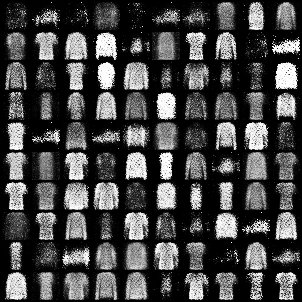

In [ ]:
from PIL import Image

# Path to the folder containing the images
folder_path = '/content/drive/My Drive/fake_images_folder_LSGAN'

# Name of the image file
image_name = 'fake_images-0010.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


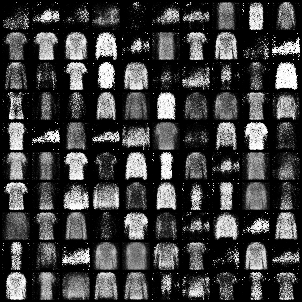

In [ ]:
# Name of the image file
image_name = 'fake_images-0020.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


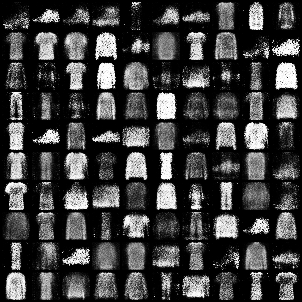

In [ ]:
# Name of the image file
image_name = 'fake_images-0030.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


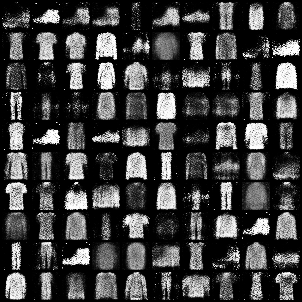

In [ ]:
# Name of the image file
image_name = 'fake_images-0040.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


#### Losses of Discriminator and Generator

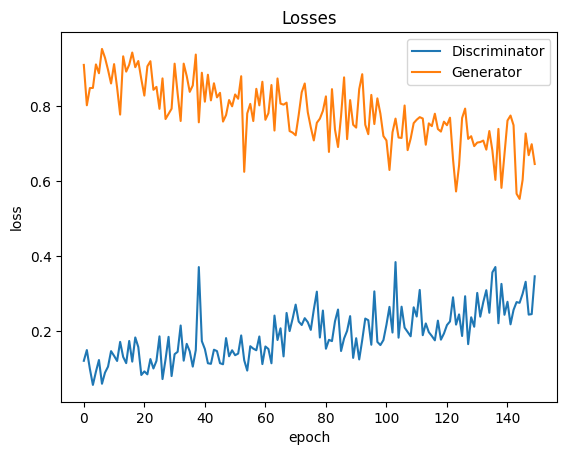

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

 we observe a trend where the discriminator's loss gradually decreases over time, indicating its increasing proficiency in distinguishing real images from fake ones. Concurrently, the generator's loss also shows a decreasing trend but with fluctuations, suggesting its ongoing struggle and eventual improvement in generating images that the discriminator finds challenging to classify. The overall downward trend in both losses signifies the maturing of the GAN, with both components learning and adapting to each other's strategies over time.

#### Real Score Vs Fake Score

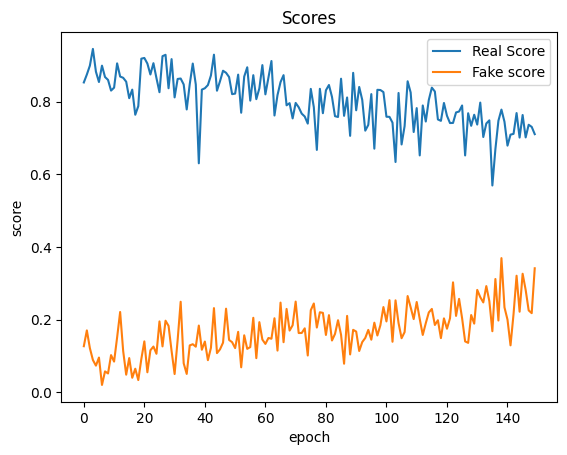

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

The graph focuses on the real and fake scores, representing the discriminator's ability to correctly identify real and generated images. The real score remains relatively high and stable, indicating consistent performance in recognizing real images. The fake score, however, starts low and exhibits an upward trend, reflecting the generator's gradual improvement in creating images that more closely resemble the real ones, thereby fooling the discriminator more effectively as training progresses.

#### Step 4. Save the model weights in the folder to be used later.



In [ ]:
torch.save(G.state_dict(), os.path.join(folder_path,'generator_model.pth'))
torch.save(D.state_dict(), os.path.join(folder_path,'discriminator_model.pth'))

#### Step 5. Load the model using the saved weights.


In [ ]:
# Load the generator model
G.load_state_dict(torch.load(os.path.join(folder_path, 'generator_model.pth')))
G.eval()  # Set the model to evaluation mode

# Load the discriminator model
D.load_state_dict(torch.load(os.path.join(folder_path, 'discriminator_model.pth')))
D.eval()  # Set the model to evaluation mode

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

#### Step 6: Re-train the GAN model to see if you can improve.

In [ ]:
import torch.optim as optim

# Define the optimizers for both networks
d_optimizer = optim.Adam(D.parameters(), lr=0.0001, betas=(0.5, 0.999))
g_optimizer = optim.Adam(G.parameters(), lr=0.0001, betas=(0.5, 0.999))

# Continue training from the 51st epoch for 50 more epochs
num_additional_epochs = 50
start_epoch = 51
end_epoch = start_epoch + num_additional_epochs
total_num_epoch = end_epoch

total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

epoch = start_epoch
while epoch < end_epoch:
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()

        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, total_num_epoch, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch)

    epoch += 1


Epoch [51/101], Step [200/600], d_loss: 0.4543, g_loss: 0.4745, D(x): 0.56, D(G(z)): 0.36
Epoch [51/101], Step [400/600], d_loss: 0.3583, g_loss: 0.4416, D(x): 0.63, D(G(z)): 0.34
Epoch [51/101], Step [600/600], d_loss: 0.4834, g_loss: 0.4187, D(x): 0.46, D(G(z)): 0.29
Saving fake_images-0051.png
Epoch [52/101], Step [200/600], d_loss: 0.4263, g_loss: 0.3880, D(x): 0.60, D(G(z)): 0.40
Epoch [52/101], Step [400/600], d_loss: 0.3973, g_loss: 0.3462, D(x): 0.60, D(G(z)): 0.38
Epoch [52/101], Step [600/600], d_loss: 0.4303, g_loss: 0.3634, D(x): 0.56, D(G(z)): 0.38
Saving fake_images-0052.png
Epoch [53/101], Step [200/600], d_loss: 0.4404, g_loss: 0.5558, D(x): 0.66, D(G(z)): 0.49
Epoch [53/101], Step [400/600], d_loss: 0.4269, g_loss: 0.4267, D(x): 0.66, D(G(z)): 0.47
Epoch [53/101], Step [600/600], d_loss: 0.3985, g_loss: 0.2734, D(x): 0.52, D(G(z)): 0.30
Saving fake_images-0053.png
Epoch [54/101], Step [200/600], d_loss: 0.4371, g_loss: 0.4060, D(x): 0.63, D(G(z)): 0.46
Epoch [54/101], 

####Saving the model weights

In [ ]:
torch.save(G.state_dict(), os.path.join(folder_path,'retrained_generator_model.pth'))
torch.save(D.state_dict(), os.path.join(folder_path,'retrained_discriminator_model.pth'))

####Loading the model weights

In [ ]:
# Load the generator model
G.load_state_dict(torch.load(os.path.join(folder_path, 'retrained_generator_model.pth')))
G.eval()  # Set the model to evaluation mode

# Load the discriminator model
D.load_state_dict(torch.load(os.path.join(folder_path, 'retrained_discriminator_model.pth')))
D.eval()  # Set the model to evaluation mode

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

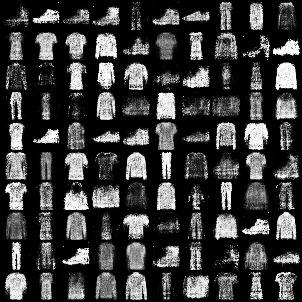

In [ ]:
# Name of the image file
image_name = 'fake_images-0055.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


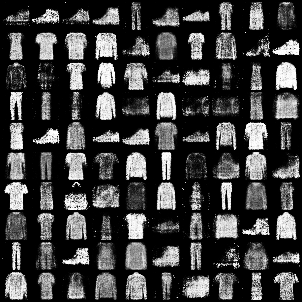

In [ ]:
# Name of the image file
image_name = 'fake_images-0070.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


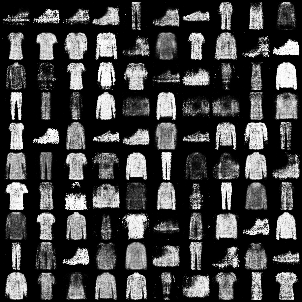

In [ ]:
# Name of the image file
image_name = 'fake_images-0080.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


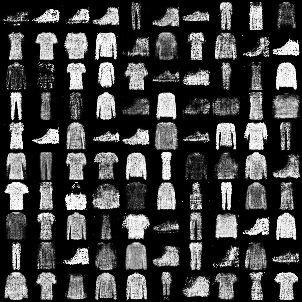

In [ ]:
# Name of the image file
image_name = 'fake_images-0100.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


#### Losses of Discriminator and Generator

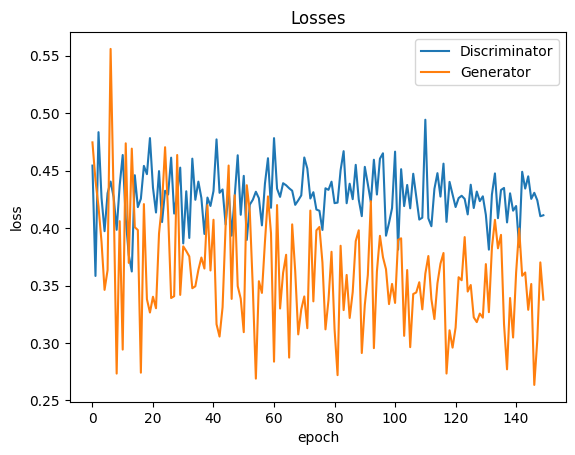

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

The graph, depicting the losses of both the discriminator and generator, shows a more stabilized pattern of fluctuation as compared to earlier epochs. This stabilization suggests that both components of the LSGAN are approaching an equilibrium, where the generator is improving in generating more convincing images, and the discriminator is becoming more adept at distinguishing between real and fake images.

#### Real Score Vs Fake Score

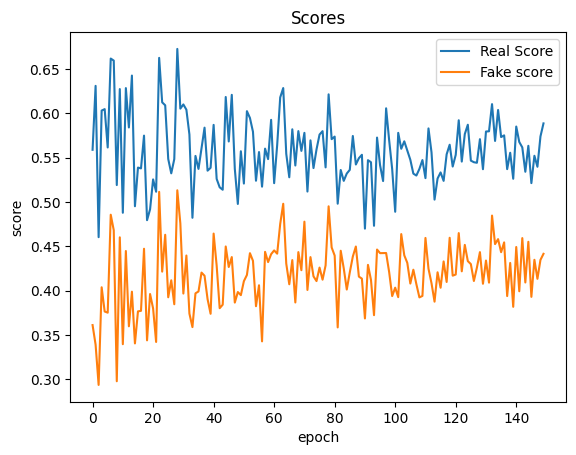

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

The graph, which plots the real and fake scores over the same period, demonstrates a narrowing gap between the two scores. The real score, representing the discriminator's ability to correctly identify real images, shows slight fluctuations but remains relatively high, indicating consistent performance. Conversely, the fake score, reflecting the discriminator's ability to identify fake images as real, increases over time. This increase signifies that the generator has become more efficient at creating images that are similar to the dataset it was trained on, thus fooling the discriminator more effectively.



#Conclusion :
Having seen the progression of both Least Squares Generative Adversarial Networks (LSGANs) and traditional Generative Adversarial Networks (GANs) from their respective 10th to 100th training epochs, a comparison reveals distinct advantages of LSGANs in terms of image generation quality.

For LSGANs, the evolution from the 10th to the 100th epoch showcases a significant enhancement in image clarity, structure, and realism. The images generated at the 100th epoch are notably more coherent, detailed, and closer to real-life representations. This improvement can be attributed to the Mean Squared Error (MSE) Loss function used in LSGANs, which promotes a smoother gradient flow and encourages the generator to produce outputs that closely mimic the real data distribution.

In contrast, while traditional GANs also demonstrate a progression in image quality over time, their outputs exhibit a different set of characteristics. The initial images at the 10th epoch for GANs, similar to LSGANs, display a level of abstraction and lack of detail. However, by the 100th epoch, despite noticeable improvements, the GAN-generated images may still exhibit higher levels of noise and less precision in replicating the specifics of the target dataset compared to LSGAN outputs.

The difference in the quality and realism of the generated images between LSGANs and GANs, particularly visible at later epochs, underscores the effectiveness of LSGANs in generating higher fidelity images. This advantage is largely due to LSGANs' targeted approach to reducing the divergence between the generated and real data distributions, facilitated by the MSE Loss function. As a result, LSGANs can be particularly beneficial in applications requiring high-quality image generation, where the fine details and overall coherence of the images are crucial.